<a href="https://colab.research.google.com/github/vamsigp/EIP-4/blob/master/wk-2/Ninth_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment - 2**

Design a CNN model to solve MNIST digits dataset

Constraints - 
1.   99.4% Accuracy
2.   < 15k Parameters
3. <= 20 epochs
4. no Fully connected Layer
5. No biases should be used




In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


### Load pre-shuffled MNIST data into train and test sets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
random_image_id = np.random.randint(low=0, high=len(X_train), dtype='int64')

(60000, 28, 28)


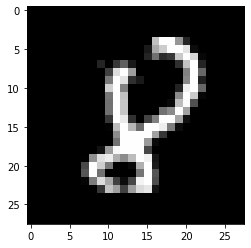

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[random_image_id], cmap='gray')

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Create Model

In [0]:
from keras.layers import Activation 


In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Conv2D(16, 3, activation='relu', use_bias=False,input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(32, 3, activation='relu', use_bias=False)) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(10, 1, activation='relu', use_bias=False)) #22

model.add(MaxPooling2D(pool_size=(2, 2))) #11

model.add(Conv2D(16, 3, activation='relu', use_bias=False)) #9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(15, 3, activation='relu', use_bias=False)) #7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(14, 3, activation='relu', use_bias=False)) #5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(13, 3, activation='relu', use_bias=False)) #3
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(10, 4, use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_22 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        4608      
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_23 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 10)       

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.32 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [30]:
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), 
          callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 14s 228us/step - loss: 0.5273 - acc: 0.8537 - val_loss: 0.1192 - val_acc: 0.9769
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022727273.
60000/60000 [==============================] - 11s 176us/step - loss: 0.2586 - acc: 0.9234 - val_loss: 0.0586 - val_acc: 0.9861
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018292683.
60000/60000 [==============================] - 10s 174us/step - loss: 0.2041 - acc: 0.9378 - val_loss: 0.0591 - val_acc: 0.9861
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015306122.
60000/60000 [==============================] - 10s 174us/step - loss: 0.1742 - acc: 0.9458 - val_loss: 0.0464 - val_acc: 0.9884
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013157895.
60000/60000 [==

In [31]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.021071910318639128, 0.9941]


### Using Global Average Pooling

In [0]:
from keras.layers import AveragePooling2D, GlobalAveragePooling2D

In [0]:
from keras.layers import Activation
model_ga = Sequential()
 
model_ga.add(Conv2D(16, 3, activation='relu', input_shape=(28,28,1))) #26
model_ga.add(BatchNormalization())
model_ga.add(Dropout(0.1))

model_ga.add(Conv2D(32, 3, activation='relu')) #24
model_ga.add(BatchNormalization())
model_ga.add(Dropout(0.1))

model_ga.add(Conv2D(10, 1, activation='relu')) #22

model_ga.add(MaxPooling2D(pool_size=(2, 2))) #11

model_ga.add(Conv2D(16, 3, activation='relu')) #9
model_ga.add(BatchNormalization())
model_ga.add(Dropout(0.1))


model_ga.add(Conv2D(14, 3, activation='relu')) #7
model_ga.add(BatchNormalization())
model_ga.add(Dropout(0.1))


model_ga.add(Conv2D(14, 3, activation='relu')) #5
model_ga.add(BatchNormalization())
model_ga.add(Dropout(0.1))


model_ga.add(Conv2D(12, 3, activation='relu')) #3
model_ga.add(BatchNormalization())
model_ga.add(Dropout(0.1))

# model.add(Conv2D(10, 4))
model_ga.add(AveragePooling2D())


# model_ga.add(Flatten())
model_ga.add(Activation('softmax'))

In [0]:
model_ga.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_45 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_45 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_46 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_46 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 24, 24, 10)       

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.322 * epoch), 10)

model_ga.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
model_ga.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), 
          callbacks=[LearningRateScheduler(scheduler, verbose=1)])

ValueError: ignored